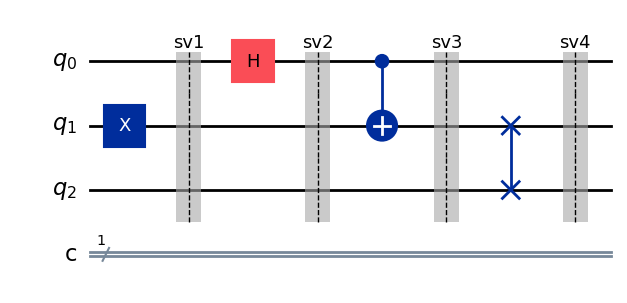

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

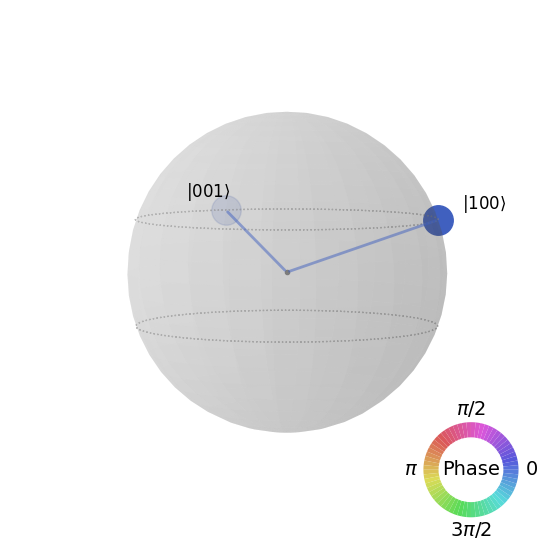

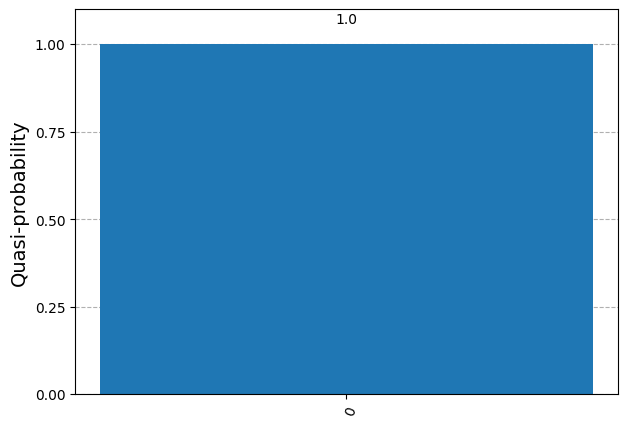

In [1]:
# quantum_circuit1.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
    plot_state_qsphere,
)
from qiskit_aer import AerSimulator

# Cell 1
qc = QuantumCircuit(3, 1)

qc.x(1)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.swap(1, 2)
qc.save_statevector("sv4")
qc.measure(1, 0)


# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(plot_state_qsphere(sv4))

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# Cell 2

# 1.) Statevector 4 formula is made from the position on where the numbers are in the tensor state. In this state vector we see 1/sqrt(2) in position 1 and 4 which is also the base numbers.
# This can then be traced back to the truths table and look at the ket's for the base's. This give (|001>+|100>)/sqrt(2)
# 2.) To explain why we get a 100% output for 0 is because we swap the value that is made before sv4. The reason is because q2 is not bothered and the initial starting values are 0.
# You can check this by removing the swap and you will get about 50% for both 1 and 0.

